<a href="https://colab.research.google.com/github/susan291-gifs/SussieAssignment/blob/main/DecisionTree_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def calculate_gini_impurity(y):
    """
    Calculate the Gini impurity of a node

    Parameters
    ----------
    y : array-like, shape (n_samples,)
        Class labels for samples at the node

    Returns
    -------
    float
        Gini impurity of the node
    """
    class_counts = np.bincount(y)
    class_proportions = class_counts / len(y)

    gini_impurity = 1.0 - np.sum(class_proportions ** 2)

    return gini_impurity


examples = [
    (np.array([1] * 15 + [2] * 15), 0.5),
    (np.array([1] * 15 + [2] * 15 + [3] * 15), 0.6666666666666667),
    (np.array([1] * 18 + [2] * 12), 0.48),
    (np.array([1] * 30 + [2] * 0), 0.0)
]

for y, expected_gini in examples:
    gini = calculate_gini_impurity(y)
    print(f"Class counts: {np.bincount(y)} -> Gini impurity: {gini}, Expected: {expected_gini}")

Class counts: [ 0 15 15] -> Gini impurity: 0.5, Expected: 0.5
Class counts: [ 0 15 15 15] -> Gini impurity: 0.6666666666666667, Expected: 0.6666666666666667
Class counts: [ 0 18 12] -> Gini impurity: 0.48, Expected: 0.48
Class counts: [ 0 30] -> Gini impurity: 0.0, Expected: 0.0


In [ ]:
def calculate_information_gain(parent, left, right):
    """
    Calculate the information gain between two nodes

    Parameters
    ----------
    parent : array-like, shape (n_samples,)
        Class labels for samples at the parent node
    left : array-like, shape (n_samples,)
        Class labels for samples at the left child node
    right : array-like, shape (n_samples,)
        Class labels for samples at the right child node

    Returns
    -------
    float
        Information gain between the two nodes
    """
    gini_parent = calculate_gini_impurity(parent)

    n_parent = len(parent)

    weighted_gini_children = (len(left) / n_parent) * calculate_gini_impurity(left) \
                             + (len(right) / n_parent) * calculate_gini_impurity(right)

    information_gain = gini_parent - weighted_gini_children

    return information_gain


left_node = np.array([1] * 10 + [2] * 30)
right_node = np.array([1] * 20 + [2] * 5)
parent_node = np.concatenate((left_node, right_node))
information_gain = calculate_information_gain(parent_node, left_node, right_node)
print(f"Information gain: {information_gain}")

Information gain: 0.14319526627218937


In [ ]:
class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose=False):
        self.verbose = verbose
        self.feature_index = None
        self.threshold = None
        self.class_label = None

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        best_info_gain = 0.0


        for feature_index in range(X.shape[1]):

            unique_values = np.unique(X[:, feature_index])


            for value in unique_values:
                left_indices = np.where(X[:, feature_index] <= value)[0]
                right_indices = np.where(X[:, feature_index] > value)[0]


                info_gain = calculate_information_gain(y, y[left_indices], y[right_indices])


                if info_gain > best_info_gain:
                    best_info_gain = info_gain
                    self.feature_index = feature_index
                    self.threshold = value


                    left_classes = y[left_indices]
                    right_classes = y[right_indices]
                    if len(np.unique(left_classes)) == 1:
                        left_class_label = left_classes[0]
                    else:
                        left_class_label = np.argmax(np.bincount(left_classes))
                    if len(np.unique(right_classes)) == 1:
                        right_class_label = right_classes[0]
                    else:
                        right_class_label = np.argmax(np.bincount(right_classes))

                    # Set the class label for the leaf node
                    if len(np.unique([left_class_label, right_class_label])) == 1:
                        self.class_label = left_class_label
                    else:
                        self.class_label = None  # Indicate that further split is needed

        if self.verbose:
            print(f"Selected feature index: {self.feature_index}")
            print(f"Selected threshold: {self.threshold}")
            print(f"Class label: {self.class_label}")

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        return np.where(X[:, self.feature_index] <= self.threshold, self.class_label, 1 - self.class_label)

In [ ]:
def fit(self, X, y):
    """
    Learn the decision tree classifier
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
        Features of training data
    y : The following form of ndarray, shape (n_samples,)
        Correct answer value of training data
    """
    best_info_gain = -float('inf')  # Initialize to negative infinity

    # Iterate over each feature
    for feature_index in range(X.shape[1]):
        # Get unique values of the current feature
        unique_values = np.unique(X[:, feature_index])

        # Iterate over each unique value as a potential threshold
        for value in unique_values:
            # Split the dataset based on the current feature and threshold
            left_indices = np.where(X[:, feature_index] <= value)[0]
            right_indices = np.where(X[:, feature_index] > value)[0]

            # Calculate information gain
            info_gain = calculate_information_gain(y, y[left_indices], y[right_indices])

            # Update the best split if information gain is improved
            if info_gain > best_info_gain:
                best_info_gain = info_gain
                self.feature_index = feature_index
                self.threshold = value

                # Determine the class label for the leaf node based on majority vote
                left_classes = y[left_indices]
                right_classes = y[right_indices]
                left_class_label = np.argmax(np.bincount(left_classes))
                right_class_label = np.argmax(np.bincount(right_classes))

                # Set the class label for the leaf node
                if left_class_label == right_class_label:
                    self.class_label = left_class_label
                else:
                    self.class_label = np.argmax(np.bincount(y))  # Set to majority class of y

    if self.verbose:
        print(f"Selected feature index: {self.feature_index}")
        print(f"Selected threshold: {self.threshold}")
        print(f"Class label: {self.class_label}")

In [ ]:
class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose=False):

        self.verbose = verbose
        self.feature_index = None
        self.threshold = None
        self.class_label = None

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        best_info_gain = -float('inf')  # Initialize to negative infinity


        for feature_index in range(X.shape[1]):

            unique_values = np.unique(X[:, feature_index])


            for value in unique_values:

                left_indices = np.where(X[:, feature_index] <= value)[0]
                right_indices = np.where(X[:, feature_index] > value)[0]


                info_gain = calculate_information_gain(y, y[left_indices], y[right_indices])


                if info_gain > best_info_gain:
                    best_info_gain = info_gain
                    self.feature_index = feature_index
                    self.threshold = value


                    left_classes = y[left_indices]
                    right_classes = y[right_indices]
                    left_class_label = np.argmax(np.bincount(left_classes))
                    right_class_label = np.argmax(np.bincount(right_classes))


                    if left_class_label == right_class_label:
                        self.class_label = left_class_label
                    else:
                        self.class_label = np.argmax(np.bincount(y))  # Set to majority class of y

        if self.verbose:
            print(f"Selected feature index: {self.feature_index}")
            print(f"Selected threshold: {self.threshold}")
            print(f"Class label: {self.class_label}")

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        if self.class_label is None:
            raise ValueError("Model not fitted. Please fit the model before making predictions.")


        return np.where(X[:, self.feature_index] <= self.threshold, self.class_label, 1 - self.class_label)

def calculate_information_gain(parent, left_child, right_child):
    """
    Calculate the information gain based on the parent and child nodes
    """

    parent_impurity = gini_impurity(parent)


    left_impurity = gini_impurity(left_child)
    right_impurity = gini_impurity(right_child)
    total_samples = len(left_child) + len(right_child)
    weighted_impurity = (len(left_child) / total_samples) * left_impurity + (len(right_child) / total_samples) * right_impurity


    information_gain = parent_impurity - weighted_impurity
    return information_gain

def gini_impurity(y):
    """
    Calculate the Gini impurity of a node
    """
    if len(y) == 0:
        return 0


    classes, counts = np.unique(y, return_counts=True)
    proportions = counts / len(y)


    gini = 1 - np.sum(proportions ** 2)
    return gini

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scratch_tree = ScratchDecesionTreeClassifierDepth1()
scratch_tree.fit(X_train, y_train)
scratch_pred = scratch_tree.predict(X_test)


sklearn_tree = DecisionTreeClassifier(max_depth=1, random_state=42)
sklearn_tree.fit(X_train, y_train)
sklearn_pred = sklearn_tree.predict(X_test)


scratch_accuracy = accuracy_score(y_test, scratch_pred)
scratch_precision = precision_score(y_test, scratch_pred)
scratch_recall = recall_score(y_test, scratch_pred)

sklearn_accuracy = accuracy_score(y_test, sklearn_pred)
sklearn_precision = precision_score(y_test, sklearn_pred)
sklearn_recall = recall_score(y_test, sklearn_pred)

print("Scratch Implementation:")
print(f"Accuracy: {scratch_accuracy:.4f}, Precision: {scratch_precision:.4f}, Recall: {scratch_recall:.4f}")

print("\nScikit-learn Implementation:")
print(f"Accuracy: {sklearn_accuracy:.4f}, Precision: {sklearn_precision:.4f}, Recall: {sklearn_recall:.4f}")

Scratch Implementation:
Accuracy: 0.8600, Precision: 0.8692, Recall: 0.8692

Scikit-learn Implementation:
Accuracy: 0.8600, Precision: 0.8692, Recall: 0.8692


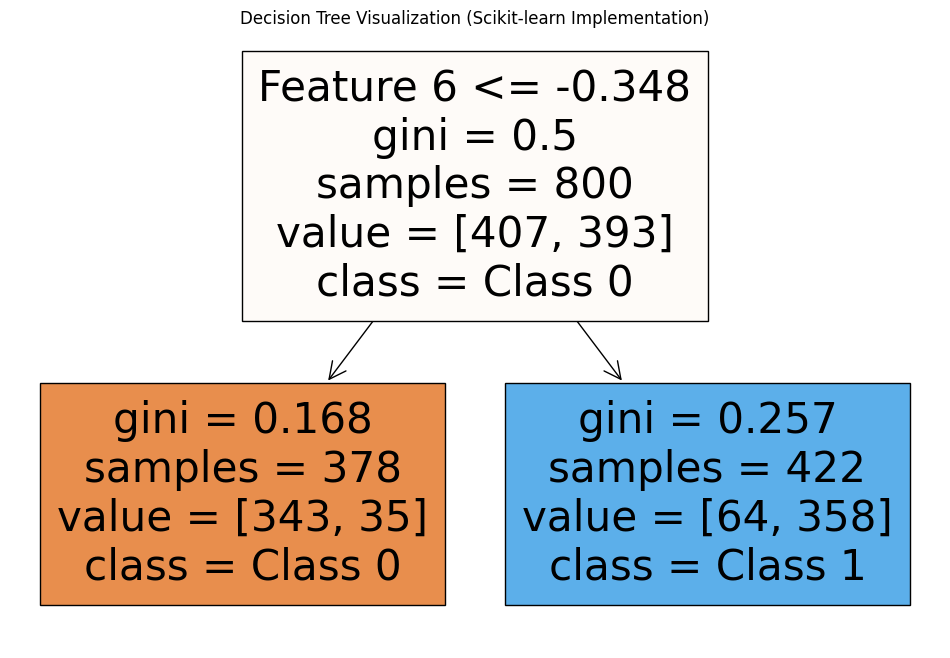

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(sklearn_tree, filled=True, feature_names=[f"Feature {i+1}" for i in range(X.shape[1])], class_names=["Class 0", "Class 1"])
plt.title("Decision Tree Visualization (Scikit-learn Implementation)")
plt.show()